<a href="https://colab.research.google.com/github/ilhamydn17/2141720091-MachLearn-2023/blob/week-11/Prak_2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 2 - CNN
## Klasifikasi Multi-label dengan Data CIFAT

### Import library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Unduh Dataset CIFAR

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 11s 0us/step


### Verifikasi Data

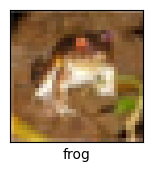

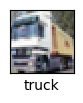

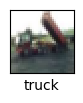

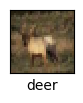

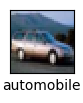

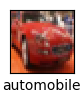

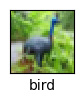

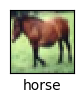

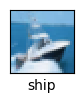

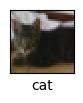

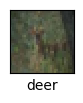

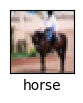

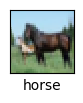

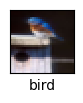

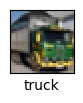

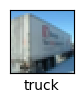

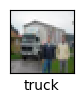

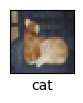

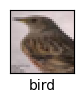

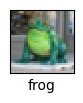

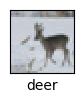

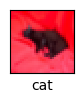

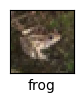

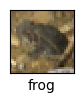

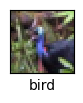

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

### Pembuatan Model CNN

#### Layer Konvolusi

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Cek Arsitektur

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

#### Menambahkan Layer Fully Connected

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### Cek Arsitektur Model CNN

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

#### Compile Model CNN

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Fitting Model

In [9]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5191 - accuracy: 0.4431 - val_loss: 1.2605 - val_accuracy: 0.5469
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1675 - accuracy: 0.5846 - val_loss: 1.0765 - val_accuracy: 0.6224
Epoch 3/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.0208 - accuracy: 0.6388 - val_loss: 1.0056 - val_accuracy: 0.6471
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9248 - accuracy: 0.6772 - val_loss: 0.9427 - val_accuracy: 0.6683
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8479 - accuracy: 0.7027 - val_loss: 0.9177 - val_accuracy: 0.6791
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7932 - accuracy: 0.7198 - val_loss: 0.9256 - val_accuracy: 0.6774
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7420 - accuracy: 0.7392 - val_loss: 0.8937 -

### Evaluasi Model

313/313 - 3s - loss: 0.8579 - accuracy: 0.7095 - 3s/epoch - 11ms/step


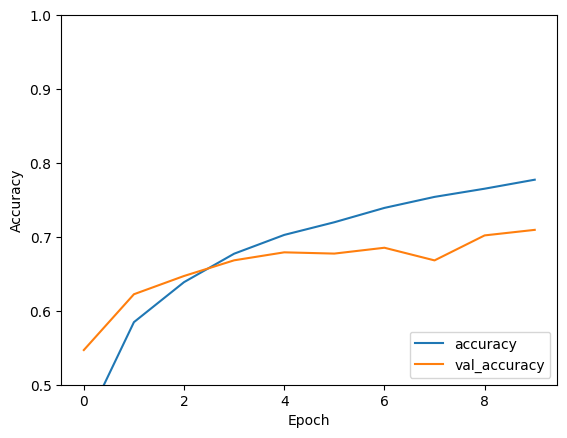

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Cetak Hasil Akurasi

In [12]:
print(test_acc)

0.7095000147819519
